# Paquetes

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.layers import LSTM, Dropout, Dense, Conv1D, Attention

2023-06-14 11:54:49.985391: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 11:54:50.252119: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-14 11:54:50.252137: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-14 11:54:50.288976: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-14 11:54:51.030653: W tensorflow/stream_executor/platform/de

# Visualizacion previa de datos

In [2]:
path = os.getcwd()

c_df = pd.read_csv(os.path.join(path, 'Datos', 'Data_Coyhaique.csv'), index_col = [0])
c_df = c_df.set_index(pd.to_datetime(c_df.index))

c_df.isna().sum()/len(c_df)*100

Presion        0.264085
Temperatura    0.310544
HR             0.308099
RapViento      0.408353
O3             8.514280
CO             8.560739
PM25           1.978189
PM10           1.672535
SO2            2.616393
DoY            0.000000
DoW            0.000000
dtype: float64

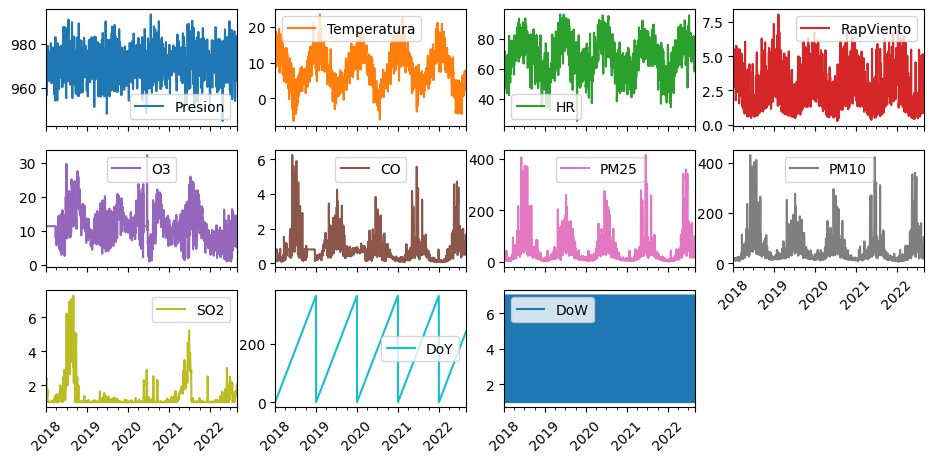

In [3]:
c_df = c_df.fillna(value = c_df.mean())

c_df_mean = c_df.resample('D',kind = 'timestamp').mean()

c_df_mean.plot(subplots = True, layout = (4,4), figsize = (7*(1+np.sqrt(5))/2,7), rot=45);

# Separación de datos

In [4]:
df_predictores = c_df_mean
df_predictores

,Presion,Temperatura,HR,RapViento,O3,CO,PM25,PM10,SO2,DoY,DoW
2018-01-01,969.583333,9.612501,67.875000,4.754167,11.375849,0.796953,11.583333,16.000000,2.342500,1.0,1.0
2018-01-02,964.333333,12.633333,67.291667,4.462500,11.375849,0.796953,8.875000,12.666667,2.283333,2.0,2.0
2018-01-03,956.333333,11.683333,64.875000,4.008333,11.375849,0.796953,11.750000,17.041667,2.405000,3.0,3.0
2018-01-04,956.958333,8.708333,69.166667,3.712500,11.375849,0.796953,15.449413,20.952188,2.277917,4.0,4.0
2018-01-05,970.916667,10.137500,60.666667,5.525000,11.375849,0.796953,9.833333,17.125000,1.572500,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,981.298417,3.674328,58.290054,4.231699,12.083333,0.773333,37.083333,38.250000,1.594583,239.0,6.0
2022-08-28,983.387333,4.749944,61.044546,1.321621,10.208333,1.049583,59.291667,60.541667,1.615417,240.0,7.0
2022-08-29,973.471458,4.198099,59.810979,0.878979,5.083333,1.662083,100.125000,104.375000,2.050417,241.0,1.0
2022-08-30,972.757625,7.101256,68.694246,1.392455,8.250000,0.639167,27.416667,29.791667,1.762917,242.0,2.0


In [5]:
met_col = ['Presion','Temperatura','HR','RapViento','DoY','DoW']

for col in met_col:
    if col == 'DoY' or col == 'DoW':
        df_predictores[col+'_forecast'] = df_predictores[col].shift(-1)
    else:
        df_predictores[col+'_forecast'] = df_predictores[col].shift(-1)*np.random.randint(90,110, df_predictores[col].shape)/100
    
df_target = c_df_mean['PM25']
df_target = df_target.shift(-1)

df_target.drop(df_target.index[-1], inplace = True)
df_predictores.drop(c_df_mean.index[-1], inplace = True)

df_ml_predictores = df_predictores.loc['2018':'2021']
df_ml_target = df_target.loc['2018':'2021']

df_ml_predictores.to_csv('Ejercicios/df_ml_predictores.csv')
df_ml_target.to_csv('Ejercicios/df_ml_target.csv')

df_2022_predictores = df_predictores.loc['2022-01-01':'2022-08-30']
df_2022_target = df_target.loc['2022-01-01':'2022-08-30']

df_2022_predictores.to_csv('Ejercicios/df_2022_predictores.csv')
df_2022_target.to_csv('Ejercicios/df_2022_target.csv')

In [6]:
df_predictores

,Presion,Temperatura,HR,RapViento,O3,CO,PM25,PM10,SO2,DoY,DoW,Presion_forecast,Temperatura_forecast,HR_forecast,RapViento_forecast,DoY_forecast,DoW_forecast
2018-01-01,969.583333,9.612501,67.875000,4.754167,11.375849,0.796953,11.583333,16.000000,2.342500,1.0,1.0,983.620000,11.496333,69.310417,4.462500,2.0,2.0
2018-01-02,964.333333,12.633333,67.291667,4.462500,11.375849,0.796953,8.875000,12.666667,2.283333,2.0,2.0,975.460000,12.384333,59.685000,4.088500,3.0,3.0
2018-01-03,956.333333,11.683333,64.875000,4.008333,11.375849,0.796953,11.750000,17.041667,2.405000,3.0,3.0,1023.945417,8.882500,73.316667,3.601125,4.0,4.0
2018-01-04,956.958333,8.708333,69.166667,3.712500,11.375849,0.796953,15.449413,20.952188,2.277917,4.0,4.0,932.080000,9.326500,58.846667,5.746000,5.0,5.0
2018-01-05,970.916667,10.137500,60.666667,5.525000,11.375849,0.796953,9.833333,17.125000,1.572500,5.0,5.0,991.142500,10.529458,67.600000,2.897917,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-26,963.039792,3.587079,73.366700,4.922593,14.500000,0.605417,21.416667,22.666667,1.684167,238.0,5.0,942.046480,3.564098,55.958452,4.443284,239.0,6.0
2022-08-27,981.298417,3.674328,58.290054,4.231699,12.083333,0.773333,37.083333,38.250000,1.594583,239.0,6.0,963.719587,4.844943,60.434100,1.215891,240.0,7.0
2022-08-28,983.387333,4.749944,61.044546,1.321621,10.208333,1.049583,59.291667,60.541667,1.615417,240.0,7.0,915.063171,4.408004,59.810979,0.887769,241.0,1.0
2022-08-29,973.471458,4.198099,59.810979,0.878979,5.083333,1.662083,100.125000,104.375000,2.050417,241.0,1.0,1021.395506,7.314294,64.572591,1.294983,242.0,2.0


## Entrenamiento y Validación

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_ml_predictores, df_ml_target, test_size = 0.30, random_state = 42)

# Feed Forward Neural Network

## 1.- Arquitectura

In [8]:
model_ffnn = tf.keras.models.Sequential()
model_ffnn.add(Dropout(0.2))
model_ffnn.add(Dense(16, activation = tf.keras.activations.relu))
model_ffnn.add(Dense(32, activation = tf.keras.activations.relu))
model_ffnn.add(Dense(64, activation = tf.keras.activations.relu))
model_ffnn.add(Dense(128, activation = tf.keras.activations.relu))
model_ffnn.add(Dense(64, activation = tf.keras.activations.relu))
model_ffnn.add(Dense(32, activation = tf.keras.activations.relu))
model_ffnn.add(Dense(16, activation = tf.keras.activations.relu))
model_ffnn.add(Dense(8, activation = tf.keras.activations.relu))

## Última capa indica tarea de la red
model_ffnn.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.linear))

model_ffnn.compile(optimizer = 'adam',
                   loss = 'mean_squared_error',
                   metrics = ['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'])

input_shape = X_train.shape
model_ffnn.build(input_shape)

model_ffnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (1022, 17)                0         
                                                                 
 dense (Dense)               (1022, 16)                288       
                                                                 
 dense_1 (Dense)             (1022, 32)                544       
                                                                 
 dense_2 (Dense)             (1022, 64)                2112      
                                                                 
 dense_3 (Dense)             (1022, 128)               8320      
                                                                 
 dense_4 (Dense)             (1022, 64)                8256      
                                                                 
 dense_5 (Dense)             (1022, 32)                2

2023-06-14 11:54:53.213634: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-14 11:54:53.214298: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-14 11:54:53.214353: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-06-14 11:54:53.214397: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-06-14 11:54:53.214440: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

## 2.- Entrenamiento

In [9]:
fnnn_fit = model_ffnn.fit(X_train, y_train, epochs = 300, batch_size = 150)

Epoch 1/300
7/7 [==============================] - 1s 3ms/step - loss: 4329.0503 - mean_absolute_error: 41.3363 - mean_squared_error: 4329.0503 - mean_absolute_percentage_error: 139.8730
Epoch 2/300
7/7 [==============================] - 0s 3ms/step - loss: 2886.7329 - mean_absolute_error: 34.4811 - mean_squared_error: 2886.7329 - mean_absolute_percentage_error: 179.8037
Epoch 3/300
7/7 [==============================] - 0s 3ms/step - loss: 2697.3538 - mean_absolute_error: 32.8484 - mean_squared_error: 2697.3538 - mean_absolute_percentage_error: 169.6603
Epoch 4/300
7/7 [==============================] - 0s 3ms/step - loss: 2595.9185 - mean_absolute_error: 32.6963 - mean_squared_error: 2595.9185 - mean_absolute_percentage_error: 172.5058
Epoch 5/300
7/7 [==============================] - 0s 3ms/step - loss: 2483.2681 - mean_absolute_error: 31.2871 - mean_squared_error: 2483.2681 - mean_absolute_percentage_error: 157.5598
Epoch 6/300
7/7 [==============================] - 0s 3ms/step - 

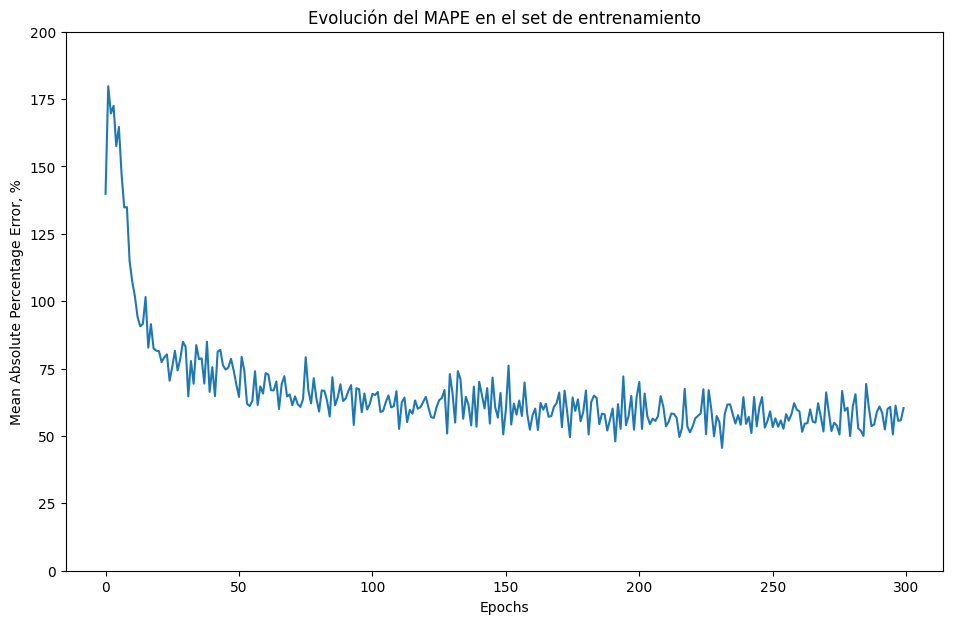

In [10]:
fig = plt.figure(figsize = (7*(1+np.sqrt(5))/2,7))
plt.plot(fnnn_fit.history['mean_absolute_percentage_error'])
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Percentage Error, %')
plt.title('Evolución del MAPE en el set de entrenamiento')
#plt.yscale('log')
plt.ylim([0,200])
plt.show()

## 3.- Evaluación

In [11]:
loss, mae, mse, mape = model_ffnn.evaluate(X_test,y_test)

14/14 [==============================] - 0s 1ms/step - loss: 890.4639 - mean_absolute_error: 14.2000 - mean_squared_error: 890.4639 - mean_absolute_percentage_error: 32.1920


## 4.- Predicción

In [12]:
pred_2022_FFNN = model_ffnn.predict(df_2022_predictores)

8/8 [==============================] - 0s 1ms/step


# Long-Short Term Memory

## 0.- Preprocesamiento LSTM

<img src= "Datos/time_series.png">

In [13]:
def reshape_for_lstm(data, timesteps, features):
    """
    Reshapes an array into the format required by an LSTM model.

    Args:
        data (numpy.ndarray): Input data array.
        timesteps (int): Number of time steps in the input sequence.
        features (int): Number of features at each time step.

    Returns:
        numpy.ndarray: Reshaped array.
    """
    # Calculate the number of samples
    num_samples = data.shape[0] - timesteps + 1

    # Create an empty array for reshaped data
    reshaped_data = np.zeros((num_samples, timesteps, features))

    # Reshape the data
    for i in range(num_samples):
        reshaped_data[i] = data[i:i + timesteps, :]

    return reshaped_data


In [14]:
n_steps = 3

predictores_lstm = reshape_for_lstm(df_ml_predictores.values,n_steps,df_ml_predictores.shape[1])

target_lstm = df_ml_target.drop(df_ml_target.index[0:n_steps-1])

X_lstm_2022 = reshape_for_lstm(df_2022_predictores.values, n_steps,df_2022_predictores.shape[1])

In [15]:
X_train_lstm, X_test_lstm, Y_train_lstm, Y_test_lstm = train_test_split(predictores_lstm, target_lstm.values, test_size = 0.30, random_state = 42)

## 1.- Arquitectura

In [16]:
model_LSTM = tf.keras.models.Sequential()

#model_LSTM.add(LSTM(32,input_shape=(X_train_lstm.shape[1],X_train_lstm.shape[2]), activation = tf.keras.activations.relu))#,return_sequences=True))

model_LSTM.add(Conv1D(filters=128, kernel_size=3, 
                      activation= tf.keras.activations.relu, 
                      input_shape=(X_train_lstm.shape[1],X_train_lstm.shape[2])))

## Capa de LSTM
model_LSTM.add(LSTM(128, 
                    activation = tf.keras.activations.relu, 
                    return_sequences=True))
model_LSTM.add(LSTM(64, 
                    activation = tf.keras.activations.relu, 
                    return_sequences=True))
model_LSTM.add(LSTM(32, 
                    activation = tf.keras.activations.relu))

## Capa de neuronas clásicas
model_LSTM.add(Dense(32, 
                     activation = tf.keras.activations.linear))

## Última capa indica función de la red
model_LSTM.add(Dense(1, activation = tf.keras.activations.linear))

model_LSTM.compile(optimizer = 'adam',
                   loss = 'mean_squared_error',
                   metrics = ['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'])

model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 128)            6656      
                                                                 
 lstm (LSTM)                 (None, 1, 128)            131584    
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             49408     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 201,153
Trainable params: 201,153
Non-tr

## 2.- Entrenamiento

In [17]:
lstm_fit = model_LSTM.fit(X_train_lstm, Y_train_lstm, epochs = 300, batch_size = 150)

Epoch 1/300
7/7 [==============================] - 2s 6ms/step - loss: 4185.3999 - mean_absolute_error: 36.9035 - mean_squared_error: 4185.3999 - mean_absolute_percentage_error: 72.5501
Epoch 2/300
7/7 [==============================] - 0s 6ms/step - loss: 3025.0403 - mean_absolute_error: 31.8785 - mean_squared_error: 3025.0403 - mean_absolute_percentage_error: 129.3409
Epoch 3/300
7/7 [==============================] - 0s 6ms/step - loss: 2627.8538 - mean_absolute_error: 37.4626 - mean_squared_error: 2627.8538 - mean_absolute_percentage_error: 227.1863
Epoch 4/300
7/7 [==============================] - 0s 6ms/step - loss: 2197.8933 - mean_absolute_error: 31.6588 - mean_squared_error: 2197.8933 - mean_absolute_percentage_error: 177.2407
Epoch 5/300
7/7 [==============================] - 0s 6ms/step - loss: 1911.0168 - mean_absolute_error: 27.0188 - mean_squared_error: 1911.0168 - mean_absolute_percentage_error: 129.0219
Epoch 6/300
7/7 [==============================] - 0s 6ms/step - l

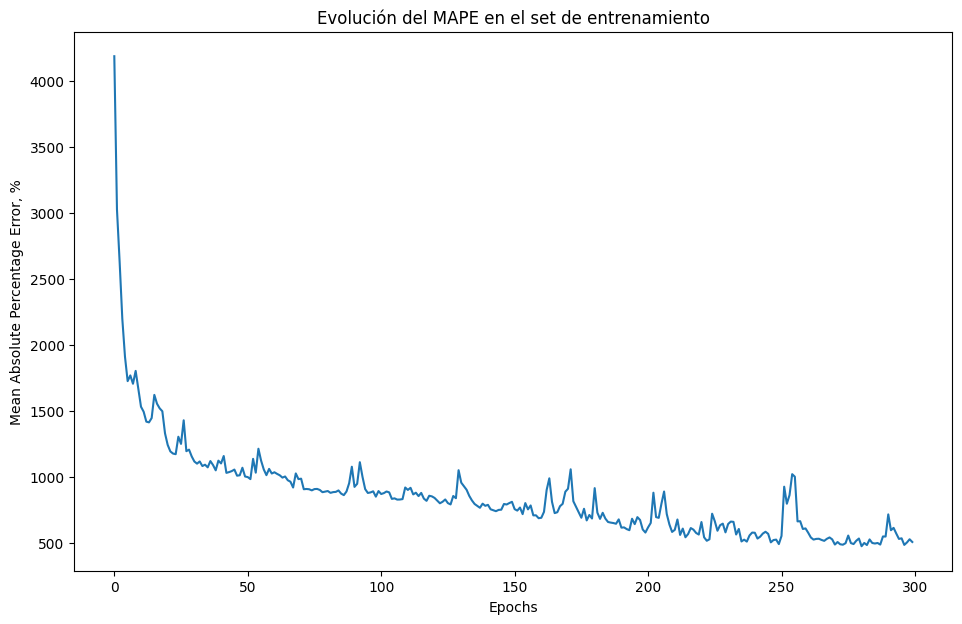

In [18]:
fig = plt.figure(figsize = (7*(1+np.sqrt(5))/2,7))
#plt.plot(lstm_fit.history['mean_absolute_percentage_error'])
plt.plot(lstm_fit.history['mean_squared_error'])
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Percentage Error, %')
plt.title('Evolución del MAPE en el set de entrenamiento')
#plt.yscale('log')
#plt.ylim([0,200])
plt.show()

In [19]:
#lstm_fit.history['mean_absolute_percentage_error'][-1]

## 3.- Evaluación

In [20]:
loss, mae, mse, mape = model_LSTM.evaluate(X_test_lstm,Y_test_lstm)

14/14 [==============================] - 0s 2ms/step - loss: 698.6761 - mean_absolute_error: 13.2925 - mean_squared_error: 698.6761 - mean_absolute_percentage_error: 38.0197


## 4.- Predicción

In [21]:
pred_2022_LSTM = np.squeeze(model_LSTM.predict(X_lstm_2022))

8/8 [==============================] - 0s 2ms/step


# Comparación de modelos

In [22]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
df_2022_LR = reg.predict(df_2022_predictores) 

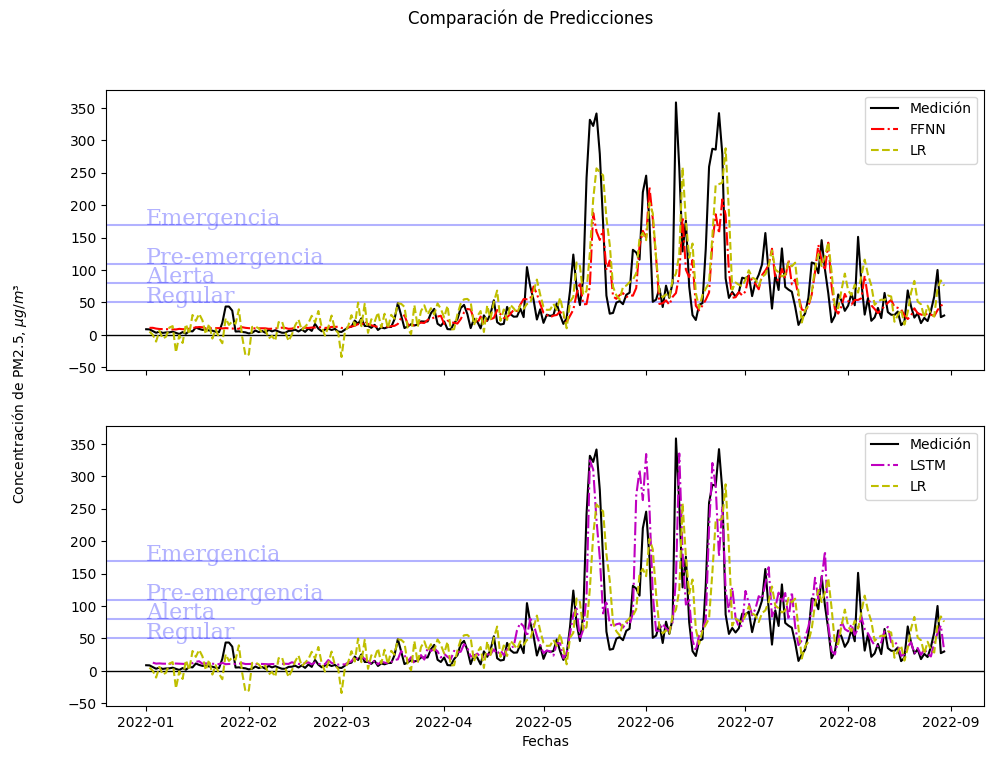

In [23]:
# df_2022_target, pred_2022_FFNN, pred_2022_LSTM
font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        'alpha': 0.3
        }

fig, axs = plt.subplots(2,1,figsize = (7*(1+np.sqrt(5))/2,8), sharex = True, sharey = True)

axs[0].axhline(y = 0, color = 'k', linestyle = '-',linewidth = 1)
axs[0].axhline(y = 50, color = 'b', linestyle = '-', alpha = 0.3)
axs[0].axhline(y = 80, color = 'b', linestyle = '-', alpha = 0.3)
axs[0].axhline(y = 110, color = 'b', linestyle = '-', alpha = 0.3)
axs[0].axhline(y = 170, color = 'b', linestyle = '-', alpha = 0.3)

axs[0].plot(df_2022_target, '-k', label = r'Medición')
axs[0].plot(df_2022_target.index[1::],pred_2022_FFNN[0:-1], '-.r', label = r'FFNN')
#axs[0].plot(df_2022_target.index[4::],pred_2022_LSTM, '-.m', label = r'LSTM')
axs[0].plot(df_2022_target.index[1::],df_2022_LR[0:-1], '--y', label = r'LR')

axs[0].legend()

axs[0].text(df_2022_target.index[0], 50, r'Regular', font)
axs[0].text(df_2022_target.index[0], 80, r'Alerta', font)
axs[0].text(df_2022_target.index[0], 110, r'Pre-emergencia', font)
axs[0].text(df_2022_target.index[0], 170, r'Emergencia', font)

axs[1].axhline(y = 0, color = 'k', linestyle = '-',linewidth = 1)
axs[1].axhline(y = 50, color = 'b', linestyle = '-', alpha = 0.3)
axs[1].axhline(y = 80, color = 'b', linestyle = '-', alpha = 0.3)
axs[1].axhline(y = 110, color = 'b', linestyle = '-', alpha = 0.3)
axs[1].axhline(y = 170, color = 'b', linestyle = '-', alpha = 0.3)

axs[1].plot(df_2022_target, '-k', label = r'Medición')
#axs[1].plot(df_2022_target.index[1::],pred_2022_FFNN[0:-1], '-c', label = r'FFNN')
axs[1].plot(df_2022_target.index[(n_steps-1)::],pred_2022_LSTM, '-.m', label = r'LSTM')
axs[1].plot(df_2022_target.index[1::],df_2022_LR[0:-1], '--y', label = r'LR')

axs[1].legend()

axs[1].text(df_2022_target.index[0], 50, r'Regular', font)
axs[1].text(df_2022_target.index[0], 80, r'Alerta', font)
axs[1].text(df_2022_target.index[0], 110, r'Pre-emergencia', font)
axs[1].text(df_2022_target.index[0], 170, r'Emergencia', font)

#plt.xticks(range(len(df_2022_target.index)),df_2022_target.index)
plt.suptitle(r'Comparación de Predicciones')
plt.xlabel(r'Fechas')
#plt.ylabel(r'Concentración de PM2.5, $\mu g/m³$')
fig.text(0.04, 0.5, r'Concentración de PM2.5, $\mu g/m³$', va='center', rotation='vertical')
plt.show()